# Aula 2.1 - Árvores de Decisão pt2

Continuando a nossa aula de árvores de decisão, hoje vamos focar em árvores de decisão para problemas de regressão.

- 1) Como adaptar o algoritmo das árvores de decisão para problemas de regressão?
- 2) Como avaliar meu modelo final de regressão? 

## 1) Árvores de Decisão para Regressão

Quando tínhamos o problema de classificação, nossa ideia era:<br>
<br>

<div style="background-color:rgba(0, 0, 0, 0.0470588); padding:10px 0; font-family:monospace;">
| 1. Criar uma árvore de decisão em cima das minhas "features" e dos meus "labels". <br>
| &nbsp;&nbsp; | Para decidir os splits automaticamente, usamos critérios de impureza (Gini, entropia)  <br>
| <br>
| 2. A classe prevista para um novo caso é dada pela folha que o novo ponto irá cair. <br>
| &nbsp;&nbsp; | A gente percorre a árvore, usando os dados desse novo ponto, e onde ela cair no fim (a folha final) decide a classe dela. <br>
</div>

<br><br>

A gente pode adaptar essa ideia para __problemas de regressão__. <br>
<br>
<div style="background-color:rgba(0, 0, 0, 0.0470588); padding:10px 0; font-family:monospace;">
| 1. Criar uma árvore de decisão em cima das minhas "features" e dos meus "labels". <br>
| &nbsp;&nbsp; | Para decidir os splits automaticamente, usamos o quanto teríamos de erro se parássemos naquele nó. <br>
| <br>
| 2. O valor previsto para um novo caso é o valor da folha que o novo ponto irá cair. <br>
| &nbsp;&nbsp; | A gente percorre a árvore, usando os dados desse novo ponto, e onde ela cair no fim (a folha final) decide o valor dele. <br>
</div>


Tivemos então que adaptar 2 pontos importantes:
1. Como decidir o split da árvore
2. Como decidir o valor final do nó

Vamos ver com um exemplo como faríamos isso.

In [3]:
# importe as principais bibliotecas para ciência de dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Vamos começar pelo ponto 2:<br>
A gente vai assumir que o __valor previsto para uma dada região é a média dos valores dos pontos de treino que estavam naquela região__.

In [4]:
# Vamos pegar alguns pontos de exemplo
pontos = np.array([[1.0, 0.92],
                   [1.5, 0.51],
                   [2.0, -0.10],
                   [2.5, -0.02],
                   [3.0, 0.93],
                   [3.5, 2.18]])

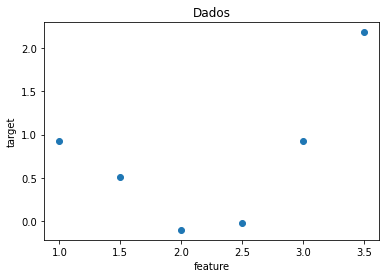

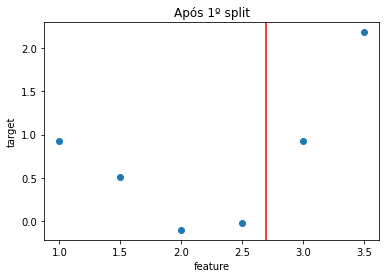

In [3]:
# Vamos desenhar eles, com um possível split inicial.
plt.title('Dados')
plt.scatter(pontos[:,0], pontos[:,1])
plt.xlabel('feature')
plt.ylabel('target')
plt.show()

plt.title('Após 1º split')
plt.scatter(pontos[:,0], pontos[:,1])
plt.axvline(2.7, color='red')
plt.xlabel('feature')
plt.ylabel('target')
plt.show()

<font size=3> <b> Exercício 1: </b> </font>

1. Quais seriam os valores previstos do nó $ feature <= 2.7 $ (à esquerda da reta) se utilizássemos a média?
2. Quais seriam os valores previstos do nó $ feature > 2.7 $ (à esquerda da reta) se utilizássemos a média?
3. Esses valores previstos são bons? Como podemos fazer essa avaliação?
4. Qual era o melhor lugar para colocarmos aquela reta vermelha?
5. Onde você colocaria uma segunda quebra?

<br><br>

In [1]:
# Resp:
# 1. 
filtro = pontos[:, 0] <= 2.7
np.mean(pontos[filtro, 1])

# 2.
filtro = pontos[:, 0] > 2.7
np.mean(pontos[filtro, 1])


Nossa função ficou da forma:

$$ y = \left\{
\begin{array}{ll}
    0.33 & , feature <= 2.7 \\
    1.55 & , feature > 2.7
\end{array} 
\right.  $$

<br><br>

O que vamos fazer então é:
- Vamos escolher os splits que diminuíem a nossa métrica de erro
- Os valores que cada folha final da nossa árvore vai prever é a média de todos os pontos de treino que ficaram nela ao final.


Vamos considerar uma única feature gerada por uma função seno com ruído Gaussiano: se fizermos várias quebras na decision tree poderemos obter uma boa aproximação da curva real. 

<img src="images/decision-stump-1.png" style="width:400px" text="https://bradleyboehmke.github.io/HOML/DT.html">
<img src="images/decision-stump-2.png" style="width:400px" />

<br>
<img src="images/depth-3-decision-tree-1.png" style="width:400px" />
<img src="images/depth-3-decision-tree-2.png" style="width:400px" />
<br>
<img src="images/deep-overfit-tree-1.png" style="width:400px"/>
<img src="images/deep-overfit-tree-2.png" style="width:400px"/>

Isso nos leva à duas perguntas: 
* Como eu escolho qual é o melhor?
* Quando parar? Isso são cenas dos próximos capítulos

## 2) Avaliando modelos de regressão

No caso de modelos de regressão, a gente quer ver o quão próximo o valor que a gente prevê está do valor real. É quase impossível "cravar" os valores e muitas vezes não é necessário. 

Para calcular o erro do modelo precisamos, de alguma forma, comparar o valor real $y_i$ da nossa amostra com o valor previsto $\hat{y}_i$.
Esse método de avaliar o quão bom nosso modelo se adequa ao dataset é chamado de função custo (cost function). Se nossa função custo der um valor muito alto saberemos que a predição não foi muito boa.

<div>
    <img src="images/erro_regressao.svg" width=800 align="center">
</div>

Vamos supor que estamos tentando prever o valor de casas de uma certa cidade. Para a primeira casa, que vale de BRL 150.000,00, nosso modelo previu um valor de BRL 145.000,00. 

Para a segunda, cujo valor é BRL 100.000,00, foi previsto BRL 105.000,00.

Como ficaria o erro médio do nosso modelo?

Na previsão da primeira casa o erro seria $e_1 = 150.000 - 145.000 = 5.000$ <br>
Na previsão da segunda casa o erro seria  $e_2 = 100.000 - 105.000 = -5.000$ <br>

Logo a média dos erros daria $ (-5000 + 5000)/2 = 0 $. <br>

Pra evitar isso, podemos elevar os erros ao quadrado ou pegar o valor absoluto deles.


- __MSE, Mean Squared Error__ (erro médio quadrático) <br>
É o valor médio do quadrado de todos os nossos erros:

$$ MSE = \frac{1}{N}\sum_{i=1}^{N} (y_i - \hat{y}_i)^2 $$

onde $i$ percorre os pontos do nosso conjunto, $y_i$ é o valor real de um dado ponto e $\hat{y}_i$ é o valor que estamos prevendo.

O fato de calcularmos o valor quadrático tem o efeito de inflar ou ampliar grandes erros. Ou seja, quanto maior a diferença entre os valores previstos e esperados, maior o erro quadrado resultante. <br>
Isso tem o efeito de “punir” modelos com erros maiores quando o MSE é usado como uma função de perda (loss function). Também tem o efeito de “punir” os modelos ao inflar a pontuação média de erro quando usada como métrica.

Por exemplo: um erro de 10 será 100x pior que um erro de 1 devido à essa atribuição de pesos distinta para valores maiores.

Em um modelo perfeito o MSE daria 0, o que significa que todas as predições batem com os valores reais. Não há limite para o valor máximo do MSE.  <br>

> Um bom valor de MSE é específico para cada dataset.
> Uma boa prática é criar um modelo para ser sua baseline utilizando um modelo simples, como por exemplo, prevendo o valor médio do target. Sabendo o valor do MSE para o modelo naive, seu objetivo será obter um MSE menor.


A unidade de medida do MSE é dada no seu valor quadrado. Por exemplo: se a unidade do nosso target é em reais o MSE terá a unidade em reais². É devido à isso que, em geral, preferimos utilizar o Root Mean Squared error.


- __RMSE, Root Mean Squared Error__ (raiz do erro quadrático médio)<br>
$$RMSE = \sqrt{MSE}$$

É comum utilizarmos o MSE como loss function e o RMSE para reportar a performance.

- __MAE, Mean Absolute Error__ (erro absoluto médio):
$$ MAE = \frac{1}{N} \sum_{i=1}^{N} |y_i - \hat{y}_i| = \frac{1}{N} \sum_{i=1}^{N} |\text{erro}_i|$$

<br><br>

Uma vez que estamos calculando os valores absolutos, todos os erros terão um peso em uma mesma escala linear. Isso faz com que a MAE seja mais robusta a outliers do que a MSE.

<img src="images/Comparison-of-the-MSE-MAE-and-Huber-losses.png" style="width:500px"/>


- __Huber__ : <br>

Essa loss function consegue balancear o que há de melhor entre a MSE e a MAE: <br>
 - para valores menores do que $\delta$ use a MSE; para valores maiores use MAE.


<img src="images/huber.png" style="width:400px"/>


- $R^2$, __coeficiente de determinação__ : <br>
Existe uma terceira métrica que as pessoas usam, que é o $R^2$ (conhecido como __coeficiente de determinação__). Ele é definido como <br><br>

$$R^2 = 1 - \frac{\sum_i \text{erro}_i^2}{\sum_i y_i - \bar{y}}$$ 


onde $\bar{y}$ é o valor médio dos valores ("labels", "target") do meu conjunto, e $i$ percorre todos os pontos do conjunto. Em geral, eu recomendo não usar $R^2$. Ele tem uma série de fraquezas, e pode levar a enganos.

O MAE, assim como o RMSE, possuia as unidades de erro na mesma unidade do target que está sendo predito.

Eu vou mostrar ele aqui nesse notebook, mas no futuro, não devo mais usar.

É difícil explicar em mais detalhes sem conhecimentos mais sólidos, mas quem tiver mais conhecimento estatístico e quiser entender mais, fica uma referência: [Cosma Shalizi](https://www.stat.cmu.edu/~cshalizi/mreg/15/lectures/10/lecture-10.pdf) (olhe a página 17 e 18)

### Dataset

In [13]:
from sklearn.datasets import load_boston
dados = load_boston()
X = pd.DataFrame(data=dados['data'], columns=dados['feature_names'])
y = pd.Series(data=dados['target'],name='price')

/home/patricia/Documentos/escritorio_dados/venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include

In [14]:
print(dados['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [15]:
print(X.shape)

(506, 13)


In [16]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [18]:
y.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: price, dtype: float64

In [19]:
X['CHAS'] = X['CHAS'].astype(int)

In [20]:
# Sempre começar com a nossa famosa separação treino e validação
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                  test_size=0.3)

In [22]:
# Agora a gente treina nossa árvore de decisão para regressão
from sklearn.tree import DecisionTreeRegressor

In [23]:
# Instanciar a classe do modelo
model_tree = DecisionTreeRegressor()

In [24]:
# Treina o modelo
model_tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [25]:
# Faz predições no conjunto de validação
y_pred = model_tree.predict(X_val)

In [26]:
print(y_pred)

[20.4 20.4 16.8 26.4 13.8 19.4 24.5 16.1 10.2 15.2 23.6 50.  20.1 20.
 18.3 12.7 27.9 32.  22.6 50.  14.1 10.9 23.2 12.1 38.7 48.8 27.9 27.5
 32.2 22.6 22.5 12.6 32.4 19.4 19.6  7.2 21.5 20.2 14.5 21.5 14.4 32.2
 34.7 23.8 12.5 18.5 24.5 21.5 10.2 18.7 33.3 15.6 33.3 22.8 26.4 14.1
 14.3 20.7 34.9 10.9  8.3 26.6 22.5 10.2 24.5 21.7 18.9 14.  50.  24.8
 48.8 48.8 27.9 19.7 20.5 22.  21.2 14.1 23.5  8.5 19.  11.7 25.2 20.2
  7.2 22.8 18.  15.  26.4 50.  17.3 22.5 27.1 17.4 50.  25.2 50.  24.5
 20.1 19.5 14.3 29.8 17.3 20.4 24.5 14.6 12.8 17.5 14.1 27.5 20.  24.4
 14.3 50.  13.4 15.2 22.8 34.7 23.8 20.2 23.1 19.6 21.6 21.7 16.5 24.7
 19.5 23.  16.5 22.6 22.2 24.5 21.2 14.9 50.  16.7 22.9 27.9 23.2 33.1
 16.1 20.1 14.5 17.5 10.8  8.7 29.8 37.  24.5 20.6 26.6 19.6]


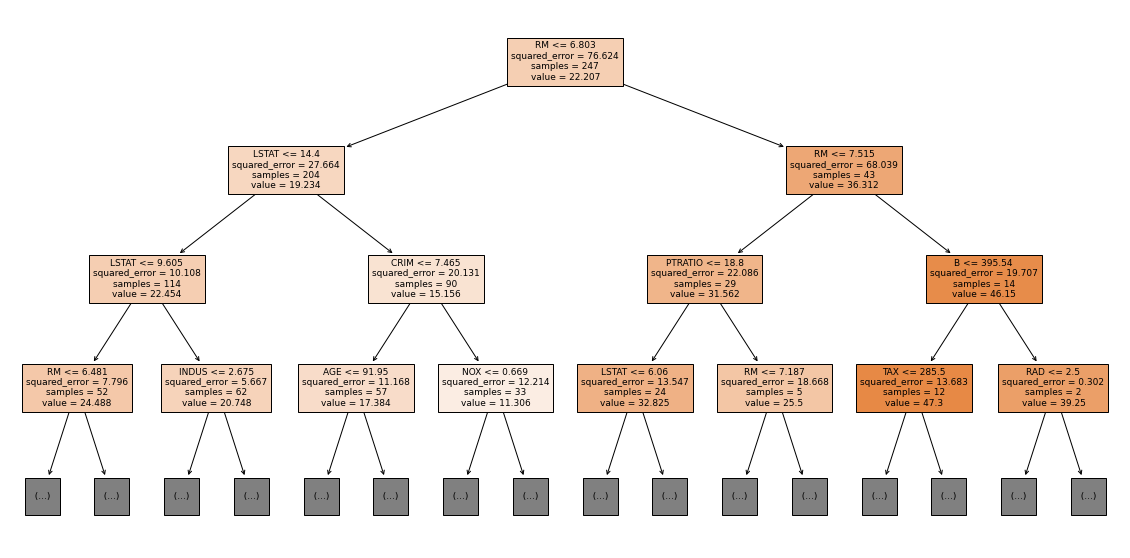

In [ ]:
# Como ficou a árvore?
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(model_tree, feature_names=X_train.columns, max_depth=3, fontsize=9, filled=True)
plt.show()


In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [31]:
# Print das Métricas
print('Métricas para a Previsão:')
print('MAE:  ', np.round(mean_absolute_error(y_val, y_pred), decimals=3))
print('MSE:  ', np.round(mean_squared_error(y_val, y_pred), decimals=3))
print('RMSE: ', np.round(mean_squared_error(y_val, y_pred, squared=False), decimals=3))
print('R^2:  ', np.round(r2_score(y_val, y_pred), decimals=3))

Métricas para a Previsão:
MAE:   2.666
MSE:   13.34
RMSE:  3.652
R^2:   0.851


<AxesSubplot:xlabel='price'>

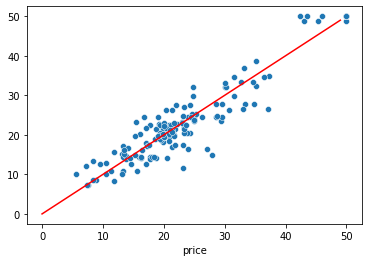

In [46]:
num_range = np.arange(0,50, 1)
sns.scatterplot(y = y_pred, x = y_val)
sns.lineplot(x=num_range, y=num_range, color='red', markers='-')


In [ ]:
# !pip install dtreeviz             # install dtreeviz for sklearn
# !pip install dtreeviz[xgboost]    # install XGBoost related dependency
# !pip install dtreeviz[pyspark]    # install pyspark related dependency
# !pip install dtreeviz[lightgbm]   # install LightGBM related dependency

In [ ]:
from dtreeviz.trees import dtreeviz

model_tree = DecisionTreeRegressor(max_depth=3)
model_tree.fit(X_train, y_train)

viz = dtreeviz(model_tree,
               X_train,
               y_train,
               target_name='price',
               feature_names=X_train.columns)

viz.view()      

/home/patricia/Documentos/escritorio_dados/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [ ]:
viz.view()

Não é só o MSE que podemos escolher, existem outros critérios de split também. Se olharmos a documentação do scikit-learn, lá fala de 4 que podemos usar:

> criterion : {"mse", "friedman_mse", "mae", "poisson"}, default="mse"<br>
  
>   The function to measure the quality of a split. Supported criteria
    are "mse" for the mean squared error, which is equal to variance
    reduction as feature selection criterion and minimizes the L2 loss
    using the mean of each terminal node, "friedman_mse", which uses mean
    squared error with Friedman's improvement score for potential splits,
    "mae" for the mean absolute error, which minimizes the L1 loss using
    the median of each terminal node, and "poisson" which uses reduction in
    Poisson deviance to find splits.

<font size=3> <b> Exercício 2: </b> </font>


Tente reproduzir o que fizemos aqui para outro modelo de regressão.

- As métricas melhoram ou pioram? <br>
- Olhando o RMSE, qual modelo você usaria? <br>
- Qual vai ser o RMSE no conjunto de testes? <br>

In [ ]:
# Pegando o modelo de regressão linear do sklearn
from sklearn.linear_model import LinearRegression

In [ ]:
model_lin = LinearRegression()

In [ ]:
# Como fazemos para treinar ele na base de treino? E para calcular os erros na base de validação?

In [ ]:
# Qual melhor modelo? Como calcular o RMSE dele na base de testes?

In [ ]:
# Vamos treinar o modelo escolhido usando TODOS os dados disponíveis.
# Esse é o cara final que iríamos salvar e usar depois no dia a dia do negócio.

## Tarefa

Vamos testar usar nossas árvores de decisão de regressão para o conjunto de dados "Ames Housing". Esse é um conjunto com diversas vendas de casas realizadas em Ames - Iowa.

O objetivo é prever o valor da venda de uma casa (SalePrice) com base nas features escolhidas. O conjunto de dados já foi previamente separado em treino e teste. Assim, só precisa tomar cuidado em separar o treino da validação.

Objetivos:
> Compare a qualidade preditiva da árvore de decisão para três conjuntos diferentes de variáveis (estes conjuntos podem ter interseções, ou seja, variáveis em comum). 
> Compare qual melhor modelo, entre uma árvore de decisão e outro modelo de regressão.

Loss functions provide more than just a static representation of how your model is performing—they’re how your algorithms fit data in the first place. Most machine learning algorithms use some sort of loss function in the process of optimization, or finding the best parameters (weights) for your data.

For a simple example, consider linear regression. In traditional “least squares” regression, the line of best fit is determined through none other than MSE (hence the least squares moniker)! For each set of weights that the model tries, the MSE is calculated across all input examples. The model then optimizes the MSE functions—or in other words, makes it the lowest possible—through the use of an optimizer algorithm like Gradient Descent.

## Bibliografia e aprofundamento
- [Métricas](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter)
- [Outras métricas](https://www.dataquest.io/blog/understanding-regression-error-metrics/) <br>
- [Scikit-Learn: Outras métricas de erro para regressão](https://scikit-learn.org/stable/modules/classes.html#regression-metrics) <br>
- [Biblioteca de visualização da árvore de decisão dtreeviz](https://github.com/parrt/dtreeviz) <br>